<a href="https://colab.research.google.com/github/JeFFich/Data_analysis/blob/main/%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
# pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:,.3f}'.format # Лучше использовать для избавления от научной нотации при выводе

In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.494,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.820,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.651,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.192,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.344,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.677,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.708,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.178,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.191,48100.0


В данном датасете (имеющим, в первую очередь, обучающий характер) представлены данные по домам в Калифорнии. Всего имеется девять столбцов со следующей информацией:


*   **longtitude** - координата дома по долготе
*   **latitude** - координата дома по широте
*   **housing_median_age** - усредненный возраст дома
*   **total_rooms** - общее кол-во комнат в доме
*   **total_bedrooms** - общее кол-во спален в доме
*   **population** - общее кол-во жильцов в доме
*   **households** - общее кол-во домохозяйств (семей)
*   **median_income** - медианный доход домохозяйств за год (в 10т долл.)
*   **median_house_value** - медианная стоимость квартиры в доме (в 1т долл.)


In [ ]:
df.shape

(17000, 9)

Общее кол-во домов - 17000

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

Все данные в датасете имеют числовой тип. Это позволит удобно применять различные численные описательные статистики, что будет показано в дальнейшем. С другой стороны, отсутствуют какие-либо категориальные признаки, из-за чего в дальнейшем может потребоваться их искусственное введение.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


В дополнение ко всему предыдущему, можно отметить отсутствие строк с NaN значениями, что освобождает от дополнительной мороки по восполнению пропусков (и делает датасет немного более "игрушечным")

In [ ]:
df.groupby("housing_median_age").size().sort_values(ascending=False)

housing_median_age
52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
40.0     249
13.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
46.0     196
12.0     192
8.0      178
47.0     175
9.0      172
4.0      161
7.0      151
48.0     135
6.0      129
50.0     112
49.0     111
2.0       49
3.0       46
51.0      32
1.0        2
dtype: int64

Возникает первая проблема отсутствия категориального признака в датасете. Чтобы все же провести некоторую разумную группировку, воспользуемся в качестве ключа значением усредненного возраста. Отсортировав результат по убыванию кол-ва записей, можно обнаружить как колоссальный разброс в показателе возраста дома, так и явное доминирование "старых" домов в датасете



---



Перейдем к рассмотрению **различных описательных статистик** датасета. Для начала вычислим стандартный набор показателей

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000
mean,-119.562,35.625,28.589,2643.664,539.411,1429.574,501.222,3.884,207300.912
std,2.005,2.137,12.587,2179.947,421.499,1147.853,384.521,1.908,115983.764
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.790,33.930,18.000,1462.000,297.000,790.000,282.000,2.566,119400.000
50%,-118.490,34.250,29.000,2127.000,434.000,1167.000,409.000,3.545,180400.000
75%,-118.000,37.720,37.000,3151.250,648.250,1721.000,605.250,4.767,265000.000
max,-114.310,41.950,52.000,37937.000,6445.000,35682.000,6082.000,15.000,500001.000


Данная статистика уже позволяет делать много различных выводов. Приведем некоторые из них:



*   Отклонение показателей *широты и долготы* **не очень велико**. Это демонстрирует компактность анализируемого региона
*   В данном регионе **большое кол-во относительно старых домов**: 75% домов из выборки старше 18 лет, а 50% - старше 29
*   В данном регионе **не очень распространен сектор частных домов**: так, явно более 75% всех домов являются многоквартирными (о чем можно судить по кол-ву комнат, проживающих и домохозяйств); при этом минимальные значения явно свидетельствуют о наличии в выборке одиночных домов
*   Стоит отметить и **наличие аномальных выбросов** у показателей *общего числа конмат, спален, проживающих людей и домохозяйств*: так в выборке имеются примеры превышения средней величины более чем в 10 раз по каждому признаку
*   В исследуемом регионе явно наблюдается **серьезная сегрегация людей по заработку**: так размах выборки по данному призанку составляют 14 500 (что эквивалентно разнице в годовой зарплате = 145 000 долл.); >50% зарабатывает меньше среднего показателя, а беднейшие 25% зарабатывает вообще лишь половину от среднего показателя зарплаты

Для более наглядной демонстрации описательной статистики изобразим ящики с усами

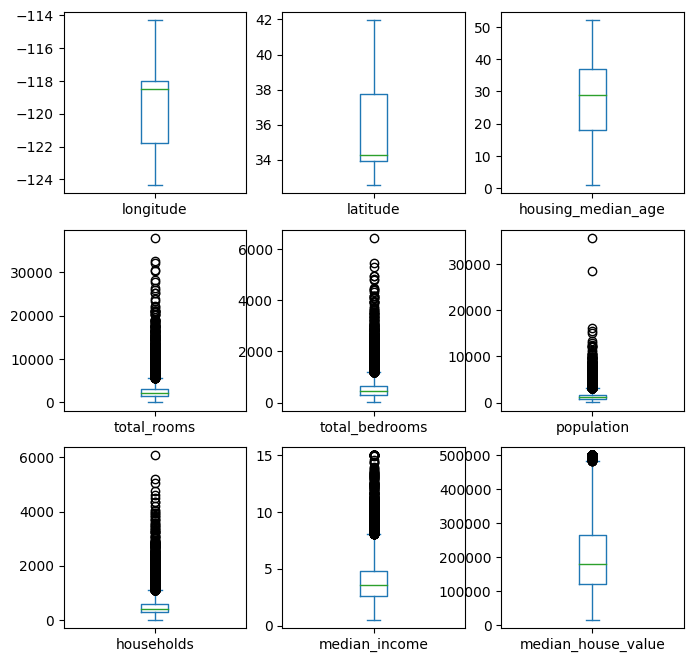

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))

plt.show()

В дополнение к указанному выше можно отметить **крайнюю сжатость некоторых ящиков** (охватывают лишь небольшую часть общего диапазона значений) и наличие у большинства показателей **большого числа выбросов**, лежащих за границами доверительного интервала



---



Теперь посмотрим на **характер распределения данных** по признакам. Для этого посчиатем показатели *асимметрии* и *эксцесса*

In [ ]:
df.skew()

longitude            -0.304
latitude              0.472
housing_median_age    0.065
total_rooms           4.003
total_bedrooms        3.323
population            5.187
households            3.343
median_income         1.627
median_house_value    0.973
dtype: float64

In [ ]:
df.kurtosis()

longitude             -1.322
latitude              -1.112
housing_median_age    -0.801
total_rooms           29.516
total_bedrooms        19.693
population            80.862
households            20.693
median_income          4.764
median_house_value     0.304
dtype: float64

По полученным показателям видно отсутствие нормального распредления у какого-нибудь признака; чтобы убедиться в справдливости данного утверждения, рассчитаем стандартные отклонения для выборки размером в 17000

In [ ]:
n = df.shape[0]

er_as = 3*(6*(n-1)/((n+1)*(n+3))) ** 0.5 # Стандартная ошибка для асимметрии
er_ex = 5*(24*n*(n-2)*(n-3)/(((n+1)**2)*(n+3)*(n+5)))**0.5 # Стандартная ошибка для эксцесса

In [ ]:
abs(df.skew()) / er_as

longitude              5.395
latitude               8.372
housing_median_age     1.152
total_rooms           71.031
total_bedrooms        58.962
population            92.050
households            59.318
median_income         28.867
median_house_value    17.267
dtype: float64

In [ ]:
abs(df.kurtosis()) / er_ex

longitude              7.042
latitude               5.923
housing_median_age     4.265
total_rooms          157.180
total_bedrooms       104.869
population           430.611
households           110.194
median_income         25.370
median_house_value     1.619
dtype: float64

Отсутствие у какого-нибудь признака обоих показателей < 3 свидетельствует о состоятельности гипотезы об **отсутствии нормального распредление у признаков**.
Более наглядно это можно обнаружить на гистограмах и ядерных функциях

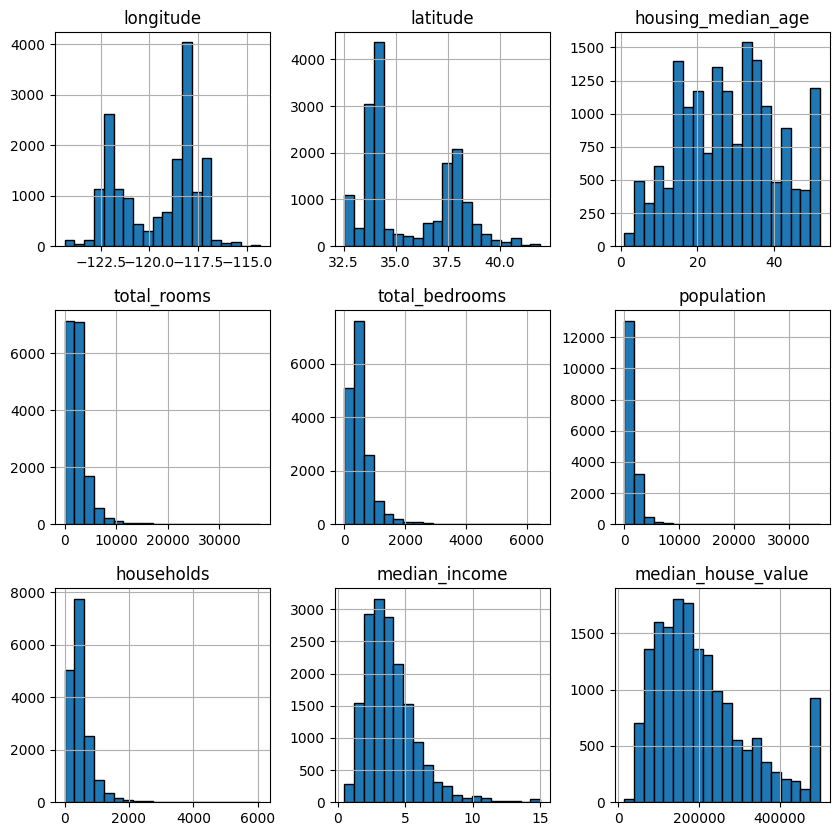

In [ ]:
df.hist(figsize=(10,10), edgecolor='black', bins=20)

plt.show()

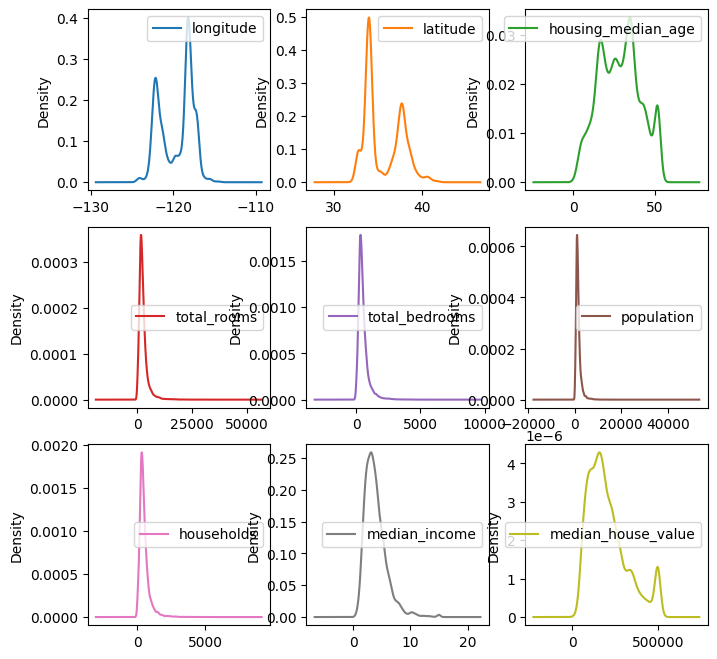

In [ ]:
df.plot(kind='kde', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))

plt.show()

Ядерные функции позволяют сделать некоторые дополнительные выводы о характере распределения значений признаков.


*   У большинства признаков наличествует явно выржаенный пик (с резким стремлением и последующим резким падением); это может свидетельствовать о явном стремлении к некоторой "эталонной" величине
*   С другой стороны, у показателей средней цены квартиры и, особенно, среднего возраста дома отсутствуют столь ярко выраженные пики, что свидетельствует об их большей рассеянности





---


Наконец, исследуем **попарные связи признаков**. Так как нормальные распределения отсутствуют, то вычислим *коэффициенты корреляции Спирмана*

In [ ]:
df.corr(method='spearman')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.879,-0.156,0.043,0.067,0.127,0.065,-0.010,-0.070
latitude,-0.879,1.000,0.036,-0.022,-0.060,-0.127,-0.079,-0.090,-0.168
housing_median_age,-0.156,0.036,1.000,-0.357,-0.308,-0.286,-0.282,-0.143,0.076
total_rooms,0.043,-0.022,-0.357,1.000,0.914,0.816,0.906,0.267,0.204
total_bedrooms,0.067,-0.060,-0.308,0.914,1.000,0.873,0.976,-0.013,0.083
population,0.127,-0.127,-0.286,0.816,0.873,1.000,0.905,-0.002,-0.001
households,0.065,-0.079,-0.282,0.906,0.976,0.905,1.000,0.023,0.109
median_income,-0.010,-0.090,-0.143,0.267,-0.013,-0.002,0.023,1.000,0.681
median_house_value,-0.070,-0.168,0.076,0.204,0.083,-0.001,0.109,0.681,1.000


Исходя из полученных значений, можно сделать следующие выводы:



1. Показатели *общего числа комнат, спален, жителей и домохозяйств* имеют **достаточно сильные попарные связи**; это, однако, естественным образом согласуется со здравым смыслом: очевидно, например, что чем больше комнат в жилом доме, тем больше и будет среди них спален (в данном случае мы не рассматриваем дома "элитарного" класса, где такая связь ослабевает)
2. **Столь же очевидная связь** имеется и между показателями *среднегодового заработка и средней стоимости квартиры* (хотя стпень у нее уже не столь ярко выражена)
3. **Не стоит придавать значения сильной связи между широтой и долготой**; это всего лишь демонстрация компактности данной статистики (то есть дома не разбросаны на большой территории); данный факт лишь способствует локализации всевозможных выводов на относительно небольшой регион
4. Примечательно и **наличие обратной связи** между *средним возрастом дома* и его *"жилыми" характеристиками* (см. пункт 1) - чем старше дом, тем меньше его вместимость (то есть меньше комнат, спален, и, как следствие, меньше жильцов и домохозяйств); тем не менее, такая связь носит слабый характер
5. Несколько неожиданным можно отметить **отсутствие выраженной связи** между *общим числом комнат* и *среднегодовым заработком/средней ценой квартиры*; этот факт может свидетельствовать о "неэкстенсивном" уклоне дорогих домов в данном регионе (то есть фокусирование не на размер предлагаемых квартир, а на другие характеристики, вроде общей экологичности или технологичности)

Остальные признаки не демонстрируют какой-либо явной связи



Для более наглядного отображения связей изобразим тепловую карту и диаграмму рассеяния

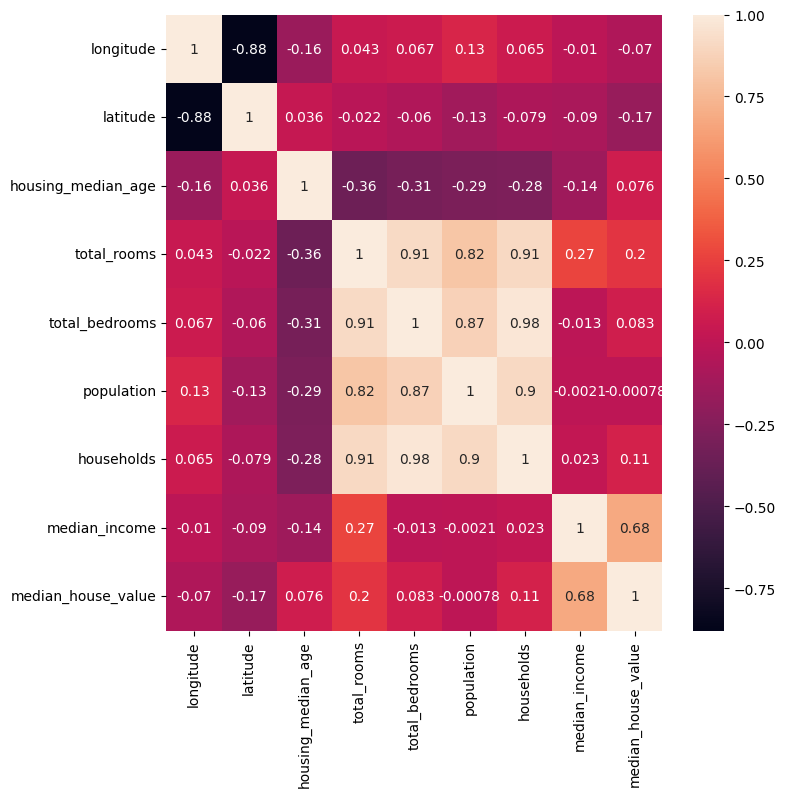

In [ ]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(method='spearman'), annot=True)

plt.show()

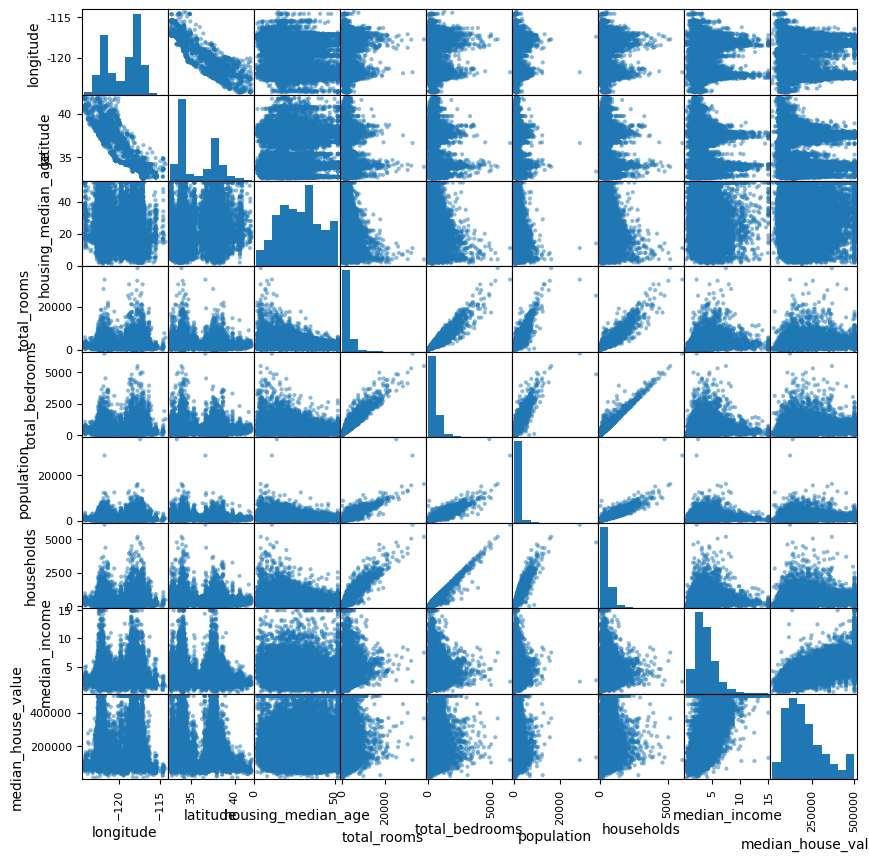

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

plt.show()

На диаграмме **явно вырисывается линейная связь** между *"характеристиками" дома*; что-то более-менее линейное можно рассмотреть и в связи двух *последних показателей*. В остальных случаях диаграммы **не демонстрируют какой либо выраженной связи признаков**